In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch
import numpy as np
import time
from collections import deque, defaultdict
import math
from networkx.drawing.nx_agraph import graphviz_layout

In [21]:
Graph = nx.nx_agraph.read_dot('./Dataset/JazzNetwork.dot/JazzNetwork.dot')
edge_list =[]
for e in Graph.edges():
    u,v = e
    edge_list.append((u,v))

node_list = []
for i in Graph.nodes():
    node_list.append(i)
    
print(len(edge_list))
print(len(node_list))

2742
198


In [35]:
def spring_embedder(G, positions, K, epsilon, delta, c_rep = 1, c_spring = 2, l = 1):
    
    def repulsive_force(distance, diff):
        return c_rep * diff / (distance**2)
    
    def spring_force(distance, diff):
        return c_spring * np.log(distance / l) * diff
    
    if positions is None:
        positions = {v: np.array([np.random.uniform(0, 1), np.random.uniform(0, 1)]) for v in G.nodes()}
    
    for iteration in range(K):
        displacement = {v: np.zeros(2) for v in G.nodes()}
        
        # Calculate repulsive forces
        for u in G.nodes():
            for v in G.nodes():
                if u != v:
                    diff = positions[u] - positions[v]
                    distance = np.linalg.norm(diff)
                    if distance > 0:
                        disp = repulsive_force(distance, diff)
                        displacement[u] += disp
        
        # Calculate attractive forces
        for u, v in G.edges():
            diff = positions[u] - positions[v]
            distance = np.linalg.norm(diff)
            if distance > 0:
                disp = spring_force(distance, diff)
                displacement[u] -= disp
                displacement[v] += disp
        
        # Update positions
        for v in positions:
            length = np.linalg.norm(displacement[v])
            if length > 0:
                # displacement vector is normalized
                positions[v] += delta * displacement[v] / length
                positions[v] = np.clip(positions[v], 0, 1)  # Keep within the bounds [0,1]x[0,1]
        
        # Check if maximum displacement is less than epsilon, if so, break
        max_displacement = max(np.linalg.norm(disp) for disp in displacement.values())
        if max_displacement < epsilon:
            break
    
    return positions

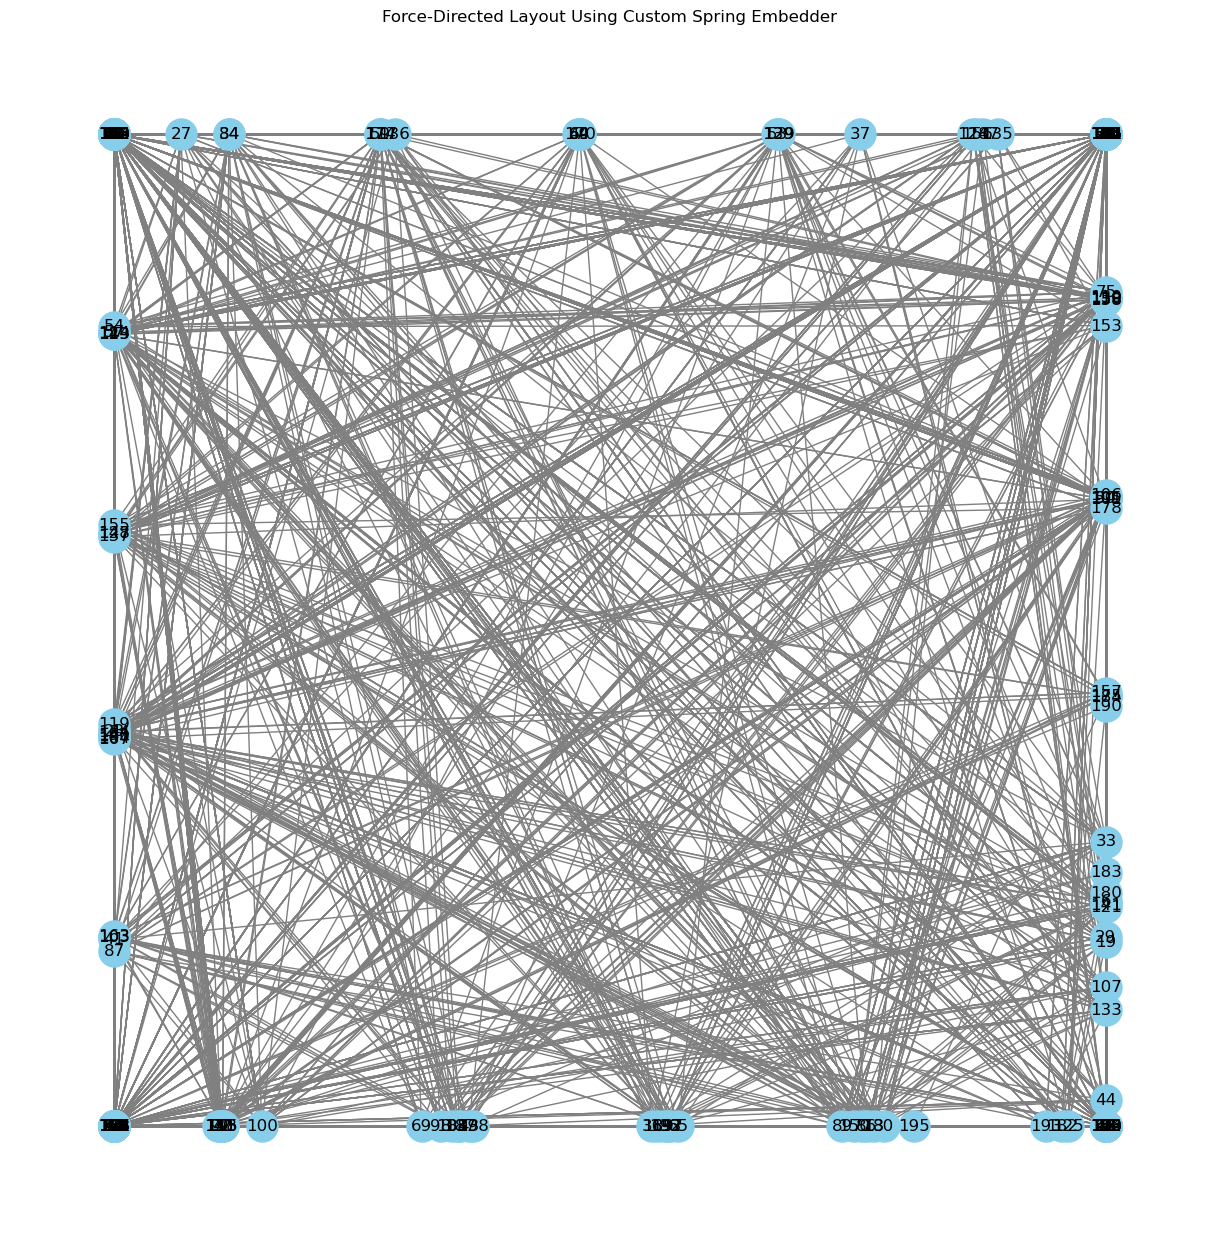

In [36]:
position = spring_embedder(G=Graph, positions= None, K=50 , epsilon=1e-4, delta=0.1, c_rep = 1, c_spring = 2, l = 1)
plt.figure(figsize=(12, 12))
nx.draw(G, position, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title('Force-Directed Layout Using Custom Spring Embedder')
plt.show()

In [42]:
def fruchterman_reingold(G, positions, K, epsilon, delta, area, c=1):
    k = c * np.sqrt(area / len(G.nodes()))  # Ideal edge length
    
    def repulsive_force(distance, diff):
        return (k**2 / distance) * diff
    
    def attractive_force(distance, diff):
        return (distance**2 / k) * diff
    
    if positions is None:
        positions = {v: np.array([np.random.uniform(0, 1), np.random.uniform(0, 1)]) for v in G.nodes()}
    
    for iteration in range(K):
        displacement = {v: np.zeros(2) for v in G.nodes()}
        
        # Calculate repulsive forces
        for u in G.nodes():
            for v in G.nodes():
                diff = positions[u] - positions[v]
                distance = np.linalg.norm(diff)
                if distance > 0:
                    disp = repulsive_force(distance, diff)
                    displacement[u] += disp
        
        # Calculate attractive forces
        for u,v in G.edges():
            diff = positions[u] - positions[v]
            distance = np.linalg.norm(diff)
            if distance > 0:
                disp = attractive_force(distance, diff)
                displacement[u] -= disp
                displacement[v] += disp
        
        # Update positions
        for v in positions:
            length = np.linalg.norm(displacement[v])
            if length > 0:
                # displacement vector is normalized
                positions[v] += delta * displacement[v] / length 
        
        max_displacement = max(np.linalg.norm(disp) for disp in displacement.values())
        
        if max_displacement < epsilon:
            break
    
    return positions


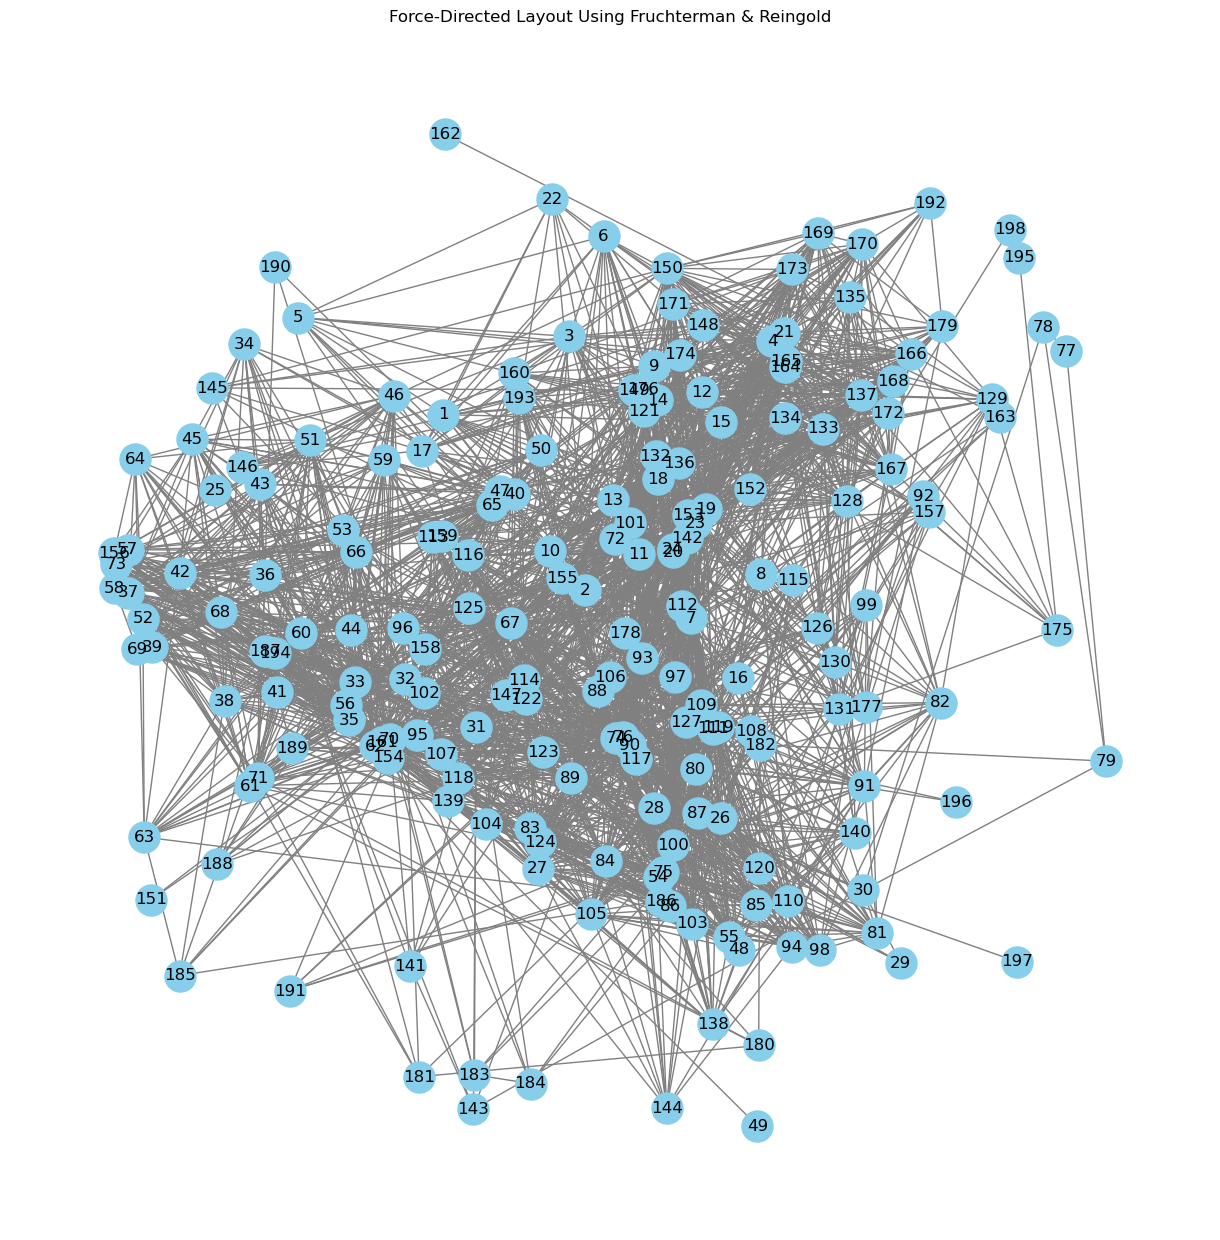

In [46]:
position = fruchterman_reingold(G=Graph, positions=None, K=50, epsilon=1e-4, delta=0.1, area=20*20)
plt.figure(figsize=(12, 12))
nx.draw(G, position, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
plt.title('Force-Directed Layout Using Fruchterman & Reingold')
plt.show()